In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

project_path = "/content/gdrive/MyDrive/AIM/Projects/FaceAge"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

import numpy as np
import pandas as pd

import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'svg'

sns.set_style(style = "whitegrid",
              rc = {"font.family": "serif",
                    "font.serif": "Times New Roman"})

---

# Data Viz

Description here.

In [ ]:
BASE_DATA_PATH = os.path.join(project_path, "data")

res_file_name = 'utk_hi-res_qa_res_1000.csv'
res_file_path = os.path.join(BASE_DATA_PATH, res_file_name) 
age_pred_df = pd.read_csv(res_file_path)

age_pred_df.head()

,subj_id,faceage,age,gender,race
0,20170110153238490,75.026596,74,1,0
1,20170109213056053,28.754343,21,1,2
2,20170117012906285,48.943560,38,0,1
3,20170117151304315,30.146162,30,1,0
4,20170116200714834,45.974422,26,0,1


---

## Overall

Description.

In [ ]:
r, pval = scipy.stats.pearsonr(age_pred_df["age"].values,
                               age_pred_df["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df["age"].values - age_pred_df["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df), r, pval_str, mae)

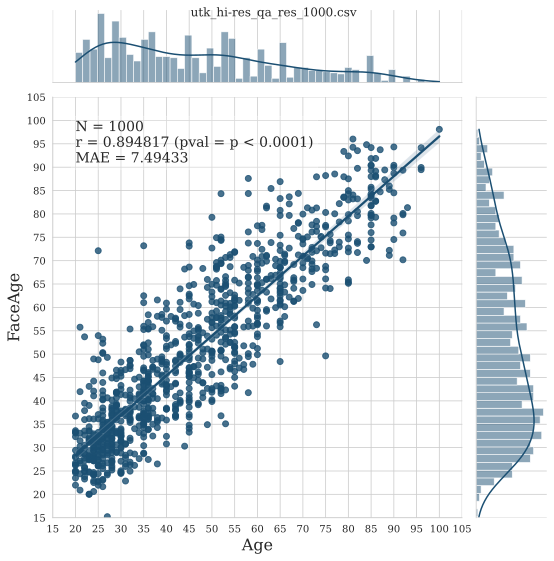

In [ ]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df,
                  kind = "reg",
                  color = "#1B4F72",
                  ratio = 5,
                  marginal_kws = dict(bins = 50),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name)

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))

---

## Female Subjects

Description.

In [ ]:
age_pred_df_f = age_pred_df[age_pred_df["gender"] == 1]


r, pval = scipy.stats.pearsonr(age_pred_df_f["age"].values,
                               age_pred_df_f["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df_f["age"].values - age_pred_df_f["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df_f), r, pval_str, mae)

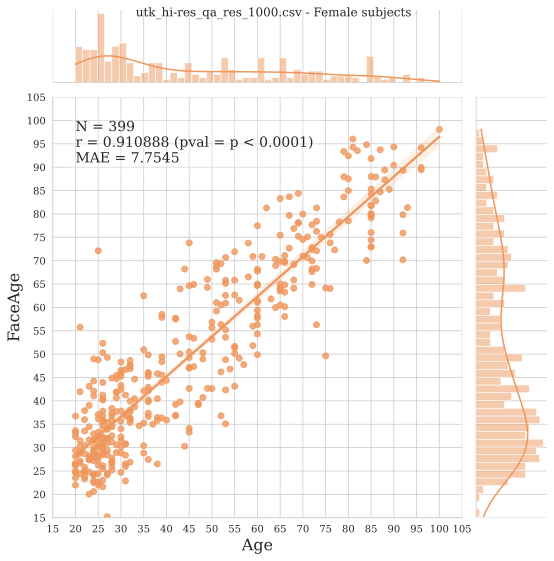

In [ ]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df_f,
                  kind = "reg",
                  color = "#EE965C",
                  ratio = 5,
                  marginal_kws = dict(bins = 50),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name + " - Female subjects")

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))

---

## Male Subjects

Description.

In [ ]:
age_pred_df_m = age_pred_df[age_pred_df["gender"] == 0]


r, pval = scipy.stats.pearsonr(age_pred_df_m["age"].values,
                               age_pred_df_m["faceage"].values)

pval_str = "%g"%(pval) if pval > 0.0001 else "p < 0.0001"

mae = np.mean(np.abs(age_pred_df_m["age"].values - age_pred_df_m["faceage"].values))

text_str = "N = %g\nr = %g (pval = %s)\nMAE = %g"%(len(age_pred_df_m), r, pval_str, mae)

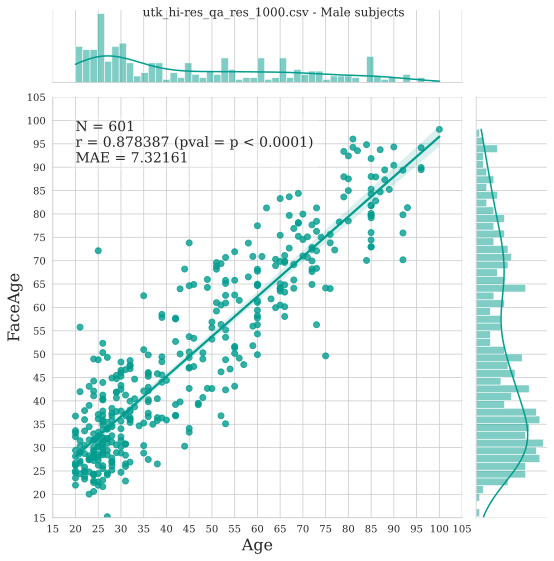

In [ ]:
p = sns.jointplot(x = "age", y = "faceage", data = age_pred_df_f,
                  kind = "reg",
                  color = "#029c8f",
                  ratio = 5,
                  marginal_kws = dict(bins = 50),
                  xlim = (15, 105),
                  ylim = (15, 105))

p.set_axis_labels(xlabel = "Age", ylabel = "FaceAge", size = 16)
p.fig.set_figwidth(8)
p.fig.set_figheight(8)
p.fig.suptitle(res_file_name + " - Male subjects")

p.ax_joint.text(20, 100, text_str,
                bbox = {"facecolor" : "white",
                        "alpha" : .25},
                fontsize = 14,
                verticalalignment = 'top')

p.ax_joint.set_xticks(np.linspace(15, 105, 19))
_ = p.ax_joint.set_yticks(np.linspace(15, 105, 19))